In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Loading the train dataset
df = pd.read_csv('train_s3TEQDk.csv')

In [3]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
df.shape

(245725, 11)

In [5]:
#Let's check the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
# Let's find out the some important stastical parameters of continuos data
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [7]:
#let's just check is there any null value. We can check from info, but i'm trying to show seperately.
df.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
#Let's see how much this Na values in percentage
df['Credit_Product'].isna().sum()/len(df)

0.11934072642181301

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

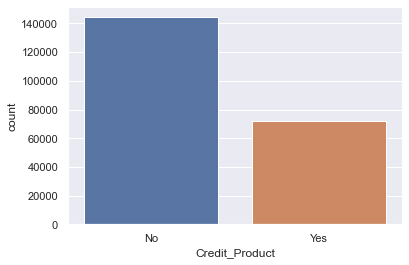

In [9]:
#Now we have 2 options, either we can drop thses Na values or fill it. We will fill these values by mode.
sns.countplot(df['Credit_Product'])

In [10]:
# from above plot, we can see 'No' is the mode. So we are going to use it.
df['Credit_Product'].fillna(df['Credit_Product'].mode()[0], inplace=True)

In [11]:
df['Credit_Product'].isna().sum()/len(df)

0.0

In [12]:
# As the first column is ID, which will not help us in the further process, So we'll going to drop it.
df = df.drop('ID', axis=1)

In [13]:
# Let's check our dataset again
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


## EDA

In [14]:
# Plot the pairplot to get important insights
#sns.pairplot(df, hue='Gender')

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

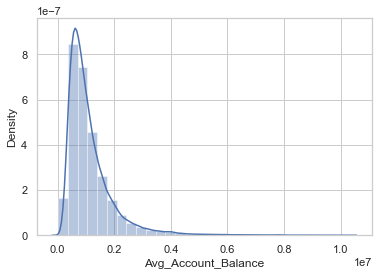

In [15]:
sns.set_style('whitegrid')
sns.distplot(df['Avg_Account_Balance'], bins=30)

From the above distribution, we can easily find out that the mean maximum people have account balance between 100000 to 200000.

<AxesSubplot:xlabel='Gender', ylabel='Avg_Account_Balance'>

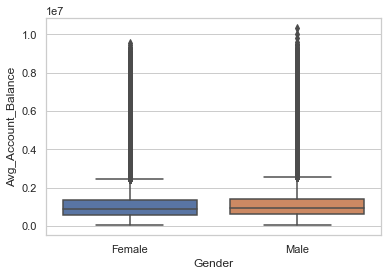

In [16]:
#let's see what bxplot show us
sns.boxplot(x='Gender', y='Avg_Account_Balance', data=df)

In [17]:
#Let's check uniqe values in Region Code
df['Region_Code'].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [18]:
#Let's check same with Age
df['Age'].unique()

array([73, 30, 56, 34, 62, 48, 40, 55, 53, 27, 31, 79, 33, 46, 59, 65, 37,
       44, 32, 50, 70, 25, 52, 26, 67, 29, 41, 49, 63, 61, 64, 60, 76, 57,
       36, 28, 58, 43, 35, 71, 82, 45, 42, 54, 47, 78, 51, 68, 83, 39, 84,
       24, 38, 74, 81, 69, 75, 85, 66, 80, 72, 77, 23], dtype=int64)

In [19]:
print('The unique values of Channel Code are: ',df['Channel_Code'].unique())
print('The unique values of Vintage are: ',df['Vintage'].unique())
print('The unique values of Is_Active are: ',df['Is_Active'].unique())

The unique values of Channel Code are:  ['X3' 'X1' 'X2' 'X4']
The unique values of Vintage are:  [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37  74 110  44   9
  68  51  98 105 127 129 133   8   7 128 135 134]
The unique values of Is_Active are:  ['No' 'Yes']


c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

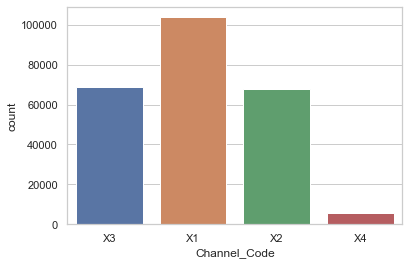

In [20]:
#countplot to see the value count of Categorical feature
sns.countplot(df['Channel_Code'])

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

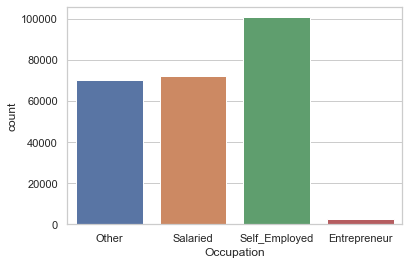

In [21]:
sns.countplot(df['Occupation'])

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

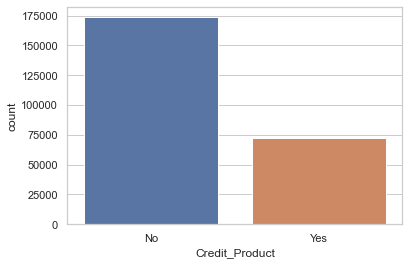

In [22]:
sns.countplot(df['Credit_Product'])

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Is_Active', ylabel='count'>

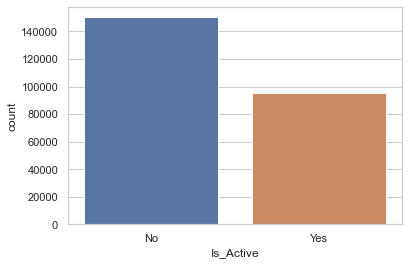

In [23]:
sns.countplot(df['Is_Active'])

## Feature Engineering

In [24]:
#Let's create dummy for categorical values
dummy1 = pd.get_dummies(df['Gender'], drop_first=True)
dummy2 = pd.get_dummies(df['Occupation'], drop_first=False)
dummy3 = pd.get_dummies(df['Channel_Code'], drop_first=False)
dummy4 = pd.get_dummies(df['Credit_Product'], drop_first=False)

In [25]:
#Renaming the column to prevent creating duplcate
dummy4 = dummy4.rename(columns={'Yes':'Cr_yes', 'No':'Cr_No'})

In [26]:
dummy5 = pd.get_dummies(df['Is_Active'], drop_first=False)

In [27]:
#Now drop the original coulmns and also the irrelevant column
df = df.drop(['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'], axis=1)

In [28]:
#Now Concate all these dummies with dataframe
New_df = pd.concat([df,dummy1,dummy2,dummy3,dummy4,dummy5], axis=1)

In [29]:
New_df.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead', 'Male',
       'Entrepreneur', 'Other', 'Salaried', 'Self_Employed', 'X1', 'X2', 'X3',
       'X4', 'Cr_No', 'Cr_yes', 'No', 'Yes'],
      dtype='object')

In [30]:
#Set the column in order
New_df = New_df[['Age', 'Vintage', 'Avg_Account_Balance', 'Male',
       'Entrepreneur', 'Other', 'Salaried', 'Self_Employed', 'X1', 'X2', 'X3',
       'X4', 'Cr_No', 'Cr_yes', 'No', 'Yes', 'Is_Lead',]]

In [31]:
New_df.head()

,Age,Vintage,Avg_Account_Balance,Male,Entrepreneur,Other,Salaried,Self_Employed,X1,X2,X3,X4,Cr_No,Cr_yes,No,Yes,Is_Lead
0,73,43,1045696,0,0,1,0,0,0,0,1,0,1,0,1,0,0
1,30,32,581988,0,0,0,1,0,1,0,0,0,1,0,1,0,0
2,56,26,1484315,0,0,0,0,1,0,0,1,0,1,0,0,1,0
3,34,19,470454,1,0,0,1,0,1,0,0,0,1,0,1,0,0
4,30,33,886787,0,0,0,1,0,1,0,0,0,1,0,1,0,0


## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#Let's devide the data into X(independent varible) and y(dependent variable)
X = New_df.drop('Is_Lead', axis=1)
y = New_df['Is_Lead']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Model Creation, Training and Prediction

In [35]:
#from sklearn.ensemble import RandomForestClassifier

In [36]:
#model = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=5, min_samples_leaf=2)

In [37]:
#model.fit(X_train,y_train)

In [38]:
#prediction = model.predict(X_test)

## Accuracy, Precision and Recall of model

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
# #print(confusion_matrix(y_test,prediction))
# print('\n')
# print(classification_report(y_test,prediction))

## XGBoost Classifier

In [41]:
from xgboost import XGBClassifier

In [42]:
xgb_model = XGBClassifier()

In [43]:
xgb_model.fit(X_train, y_train)

c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:53:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
pred = xgb_model.predict(X_test)

In [45]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[44504  2242]
 [10572  4114]]


              precision    recall  f1-score   support

           0       0.81      0.95      0.87     46746
           1       0.65      0.28      0.39     14686

    accuracy                           0.79     61432
   macro avg       0.73      0.62      0.63     61432
weighted avg       0.77      0.79      0.76     61432



## CatBoost Classifier

In [46]:
from catboost import CatBoostClassifier

In [47]:
cat = CatBoostClassifier(iterations=1000, learning_rate=0.3)

In [48]:
cat.fit(X_train,y_train)

0:	learn: 0.5560065	total: 265ms	remaining: 4m 24s
1:	learn: 0.4988835	total: 317ms	remaining: 2m 38s
2:	learn: 0.4743209	total: 359ms	remaining: 1m 59s
3:	learn: 0.4610070	total: 398ms	remaining: 1m 39s
4:	learn: 0.4546144	total: 435ms	remaining: 1m 26s
5:	learn: 0.4509704	total: 479ms	remaining: 1m 19s
6:	learn: 0.4473579	total: 536ms	remaining: 1m 15s
7:	learn: 0.4457710	total: 574ms	remaining: 1m 11s
8:	learn: 0.4442204	total: 622ms	remaining: 1m 8s
9:	learn: 0.4429537	total: 668ms	remaining: 1m 6s
10:	learn: 0.4420557	total: 720ms	remaining: 1m 4s
11:	learn: 0.4416317	total: 759ms	remaining: 1m 2s
12:	learn: 0.4412908	total: 795ms	remaining: 1m
13:	learn: 0.4408149	total: 841ms	remaining: 59.2s
14:	learn: 0.4405869	total: 884ms	remaining: 58s
15:	learn: 0.4400712	total: 937ms	remaining: 57.6s
16:	learn: 0.4398172	total: 976ms	remaining: 56.4s
17:	learn: 0.4394715	total: 1.02s	remaining: 55.7s
18:	learn: 0.4392649	total: 1.07s	remaining: 55.1s
19:	learn: 0.4390545	total: 1.12s	rema

163:	learn: 0.4277922	total: 8.24s	remaining: 42s
164:	learn: 0.4277531	total: 8.3s	remaining: 42s
165:	learn: 0.4276878	total: 8.34s	remaining: 41.9s
166:	learn: 0.4276311	total: 8.4s	remaining: 41.9s
167:	learn: 0.4275777	total: 8.44s	remaining: 41.8s
168:	learn: 0.4275108	total: 8.49s	remaining: 41.8s
169:	learn: 0.4274334	total: 8.54s	remaining: 41.7s
170:	learn: 0.4273858	total: 8.59s	remaining: 41.7s
171:	learn: 0.4273395	total: 8.64s	remaining: 41.6s
172:	learn: 0.4272857	total: 8.69s	remaining: 41.5s
173:	learn: 0.4271950	total: 8.74s	remaining: 41.5s
174:	learn: 0.4271652	total: 8.79s	remaining: 41.4s
175:	learn: 0.4271200	total: 8.83s	remaining: 41.3s
176:	learn: 0.4270584	total: 8.89s	remaining: 41.3s
177:	learn: 0.4270056	total: 8.94s	remaining: 41.3s
178:	learn: 0.4269487	total: 8.98s	remaining: 41.2s
179:	learn: 0.4268598	total: 9.04s	remaining: 41.2s
180:	learn: 0.4268181	total: 9.09s	remaining: 41.1s
181:	learn: 0.4267503	total: 9.14s	remaining: 41.1s
182:	learn: 0.4266

324:	learn: 0.4201349	total: 16.9s	remaining: 35.1s
325:	learn: 0.4200895	total: 17s	remaining: 35.1s
326:	learn: 0.4200478	total: 17s	remaining: 35s
327:	learn: 0.4200256	total: 17.1s	remaining: 35s
328:	learn: 0.4199878	total: 17.1s	remaining: 34.9s
329:	learn: 0.4199397	total: 17.2s	remaining: 34.9s
330:	learn: 0.4198853	total: 17.2s	remaining: 34.8s
331:	learn: 0.4198268	total: 17.3s	remaining: 34.8s
332:	learn: 0.4197905	total: 17.3s	remaining: 34.7s
333:	learn: 0.4197411	total: 17.4s	remaining: 34.7s
334:	learn: 0.4197022	total: 17.4s	remaining: 34.6s
335:	learn: 0.4196556	total: 17.5s	remaining: 34.6s
336:	learn: 0.4196281	total: 17.6s	remaining: 34.5s
337:	learn: 0.4195912	total: 17.6s	remaining: 34.5s
338:	learn: 0.4195354	total: 17.7s	remaining: 34.5s
339:	learn: 0.4194818	total: 17.8s	remaining: 34.5s
340:	learn: 0.4194293	total: 17.8s	remaining: 34.4s
341:	learn: 0.4193838	total: 17.9s	remaining: 34.4s
342:	learn: 0.4193338	total: 18s	remaining: 34.4s
343:	learn: 0.4192734	

485:	learn: 0.4136573	total: 26.7s	remaining: 28.3s
486:	learn: 0.4136180	total: 26.8s	remaining: 28.2s
487:	learn: 0.4135931	total: 26.8s	remaining: 28.2s
488:	learn: 0.4135574	total: 26.9s	remaining: 28.1s
489:	learn: 0.4135228	total: 27s	remaining: 28.1s
490:	learn: 0.4134884	total: 27s	remaining: 28s
491:	learn: 0.4134594	total: 27.1s	remaining: 27.9s
492:	learn: 0.4134103	total: 27.1s	remaining: 27.9s
493:	learn: 0.4133659	total: 27.2s	remaining: 27.8s
494:	learn: 0.4133243	total: 27.2s	remaining: 27.8s
495:	learn: 0.4132820	total: 27.3s	remaining: 27.7s
496:	learn: 0.4132429	total: 27.4s	remaining: 27.7s
497:	learn: 0.4132045	total: 27.4s	remaining: 27.6s
498:	learn: 0.4131588	total: 27.5s	remaining: 27.6s
499:	learn: 0.4131131	total: 27.5s	remaining: 27.5s
500:	learn: 0.4130925	total: 27.6s	remaining: 27.5s
501:	learn: 0.4130482	total: 27.7s	remaining: 27.4s
502:	learn: 0.4130138	total: 27.7s	remaining: 27.4s
503:	learn: 0.4129864	total: 27.8s	remaining: 27.3s
504:	learn: 0.4129

646:	learn: 0.4079191	total: 36.2s	remaining: 19.7s
647:	learn: 0.4078811	total: 36.2s	remaining: 19.7s
648:	learn: 0.4078429	total: 36.3s	remaining: 19.6s
649:	learn: 0.4078172	total: 36.4s	remaining: 19.6s
650:	learn: 0.4077654	total: 36.5s	remaining: 19.5s
651:	learn: 0.4077308	total: 36.5s	remaining: 19.5s
652:	learn: 0.4077059	total: 36.6s	remaining: 19.4s
653:	learn: 0.4076753	total: 36.6s	remaining: 19.4s
654:	learn: 0.4076662	total: 36.7s	remaining: 19.3s
655:	learn: 0.4076188	total: 36.8s	remaining: 19.3s
656:	learn: 0.4075749	total: 36.9s	remaining: 19.2s
657:	learn: 0.4075508	total: 36.9s	remaining: 19.2s
658:	learn: 0.4075115	total: 37s	remaining: 19.1s
659:	learn: 0.4074686	total: 37s	remaining: 19.1s
660:	learn: 0.4074398	total: 37.1s	remaining: 19s
661:	learn: 0.4074265	total: 37.2s	remaining: 19s
662:	learn: 0.4073978	total: 37.2s	remaining: 18.9s
663:	learn: 0.4073743	total: 37.3s	remaining: 18.9s
664:	learn: 0.4073310	total: 37.3s	remaining: 18.8s
665:	learn: 0.407295

805:	learn: 0.4029999	total: 45.6s	remaining: 11s
806:	learn: 0.4029673	total: 45.7s	remaining: 10.9s
807:	learn: 0.4029225	total: 45.7s	remaining: 10.9s
808:	learn: 0.4028967	total: 45.8s	remaining: 10.8s
809:	learn: 0.4028676	total: 45.8s	remaining: 10.8s
810:	learn: 0.4028162	total: 45.9s	remaining: 10.7s
811:	learn: 0.4027915	total: 46s	remaining: 10.6s
812:	learn: 0.4027407	total: 46s	remaining: 10.6s
813:	learn: 0.4026935	total: 46.1s	remaining: 10.5s
814:	learn: 0.4026569	total: 46.1s	remaining: 10.5s
815:	learn: 0.4026162	total: 46.2s	remaining: 10.4s
816:	learn: 0.4025823	total: 46.3s	remaining: 10.4s
817:	learn: 0.4025417	total: 46.3s	remaining: 10.3s
818:	learn: 0.4025164	total: 46.4s	remaining: 10.2s
819:	learn: 0.4024886	total: 46.4s	remaining: 10.2s
820:	learn: 0.4024487	total: 46.5s	remaining: 10.1s
821:	learn: 0.4024074	total: 46.5s	remaining: 10.1s
822:	learn: 0.4023676	total: 46.6s	remaining: 10s
823:	learn: 0.4023475	total: 46.7s	remaining: 9.96s
824:	learn: 0.402312

965:	learn: 0.3981572	total: 54.9s	remaining: 1.93s
966:	learn: 0.3981013	total: 54.9s	remaining: 1.87s
967:	learn: 0.3980742	total: 55s	remaining: 1.82s
968:	learn: 0.3980520	total: 55s	remaining: 1.76s
969:	learn: 0.3980279	total: 55.1s	remaining: 1.7s
970:	learn: 0.3979951	total: 55.2s	remaining: 1.65s
971:	learn: 0.3979683	total: 55.2s	remaining: 1.59s
972:	learn: 0.3979454	total: 55.3s	remaining: 1.53s
973:	learn: 0.3979252	total: 55.3s	remaining: 1.48s
974:	learn: 0.3979036	total: 55.4s	remaining: 1.42s
975:	learn: 0.3978739	total: 55.4s	remaining: 1.36s
976:	learn: 0.3978437	total: 55.5s	remaining: 1.31s
977:	learn: 0.3978256	total: 55.6s	remaining: 1.25s
978:	learn: 0.3977867	total: 55.6s	remaining: 1.19s
979:	learn: 0.3977425	total: 55.7s	remaining: 1.14s
980:	learn: 0.3977153	total: 55.7s	remaining: 1.08s
981:	learn: 0.3976995	total: 55.8s	remaining: 1.02s
982:	learn: 0.3976630	total: 55.9s	remaining: 966ms
983:	learn: 0.3976458	total: 55.9s	remaining: 909ms
984:	learn: 0.397

In [49]:
cat_pred = cat.predict(X_test)

In [50]:
print(confusion_matrix(y_test,cat_pred))
print('\n')
print(classification_report(y_test,cat_pred))

[[43834  2912]
 [10212  4474]]


              precision    recall  f1-score   support

           0       0.81      0.94      0.87     46746
           1       0.61      0.30      0.41     14686

    accuracy                           0.79     61432
   macro avg       0.71      0.62      0.64     61432
weighted avg       0.76      0.79      0.76     61432



## Saving the Model

In [51]:
#Save the model
import pickle

In [52]:
#Random Forest Model
#file_name = 'Credit Card Lead Prediction_RF.sav'
#pickle.dump(model, open(file_name, 'wb'))

NameError: name 'model' is not defined

In [ ]:
#CatBoost Model
#file_name = 'Credit Card Lead Prediction_CT.sav'
#pickle.dump(cat, open(file_name, 'wb'))

In [53]:
#XGB Model
file_name = 'Credit Card Lead Prediction_xgb.sav'
pickle.dump(xgb_model, open(file_name, 'wb'))